## 1. Use the pd.read_csv () function to load the insurance.csv dataset, attached in this lesson; store in a variable

In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## 2. Show the number of rows and columns (shape)

In [2]:
print("shape of df",df.shape)

shape of df (1338, 7)


## 3. Show basic information of the dataset with the info () function

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## 4. Show the dtype of each column

In [4]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## 5. Show the columns of the dataset

In [5]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


## 6. Show statistical information in the 'age' column

In [6]:
print(df['age'].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


## 7. Print the unique values ​​for each column, with the exception of the 'bmi' column

In [7]:
for col in df:
    if col == 'bmi':
        continue
    else:
        print(col.upper())
        print(df[col].unique())
        print()

AGE
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

SEX
['female' 'male']

CHILDREN
[0 1 3 2 5 4]

SMOKER
['yes' 'no']

REGION
['southwest' 'southeast' 'northwest' 'northeast']

CHARGES
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]



## 8. Show the age distribution (use: value_counts())

In [8]:
print(df['age'].value_counts().sort_index())

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64


## 9. Check for missing data in the dataset

In [9]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 10. Check for duplicate rows in the DataFrame, if there are duplicate rows delete

In [11]:
print(df[df.duplicated()])
df = df.drop_duplicates()

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


## 11. Show the variables with the data type object

In [12]:
print(df.select_dtypes(include = 'object'))

         sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1337 rows x 3 columns]


## 12. Show only the numeric columns of the dataset

In [13]:
print(df.select_dtypes(include = ['float', 'int']))

      age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1337 rows x 4 columns]


## 13. Convert the numeric columns to a list

In [14]:
numerical_columns = df.select_dtypes(include = ['float', 'int']).columns.tolist()
print(numerical_columns)

['age', 'bmi', 'children', 'charges']


## 14. Convert non-numeric columns to a list

In [15]:
categorical_columns = df.select_dtypes(include = 'object').columns.tolist()
print(categorical_columns)

['sex', 'smoker', 'region']


## 15. Convert the dtype of the sex, smoker and region variables to category; double check the column dtype

In [17]:
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
print(df.dtypes)


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


<ipython-input-17-ede04fecb3ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('category')


## 16. Show descriptive statistics for categorical columns

In [18]:
print(df[categorical_columns].describe().T)

       count unique        top  freq
sex     1337      2       male   675
smoker  1337      2         no  1063
region  1337      4  southeast   364


## 17. Show descriptive statistics for numerical columns

In [19]:
print(df[numerical_columns].describe().T)

           count          mean           std        min       25%        50%  \
age       1337.0     39.222139     14.044333    18.0000    27.000    39.0000   
bmi       1337.0     30.663452      6.100468    15.9600    26.290    30.4000   
children  1337.0      1.095737      1.205571     0.0000     0.000     1.0000   
charges   1337.0  13279.121487  12110.359656  1121.8739  4746.344  9386.1613   

                  75%          max  
age          51.00000     64.00000  
bmi          34.70000     53.13000  
children      2.00000      5.00000  
charges   16657.71745  63770.42801  


## 18. Show the proportion between men and women

In [20]:
print(df['sex'].value_counts())

male      675
female    662
Name: sex, dtype: int64


## 19. Return all persons aged 62 or over

In [21]:
print(df.loc[df['age']>=62])

      age     sex     bmi  children smoker     region      charges
11     62  female  26.290         0    yes  southeast  27808.72510
26     63  female  23.085         0     no  northeast  14451.83515
33     63    male  28.310         0     no  northwest  13770.09790
36     62  female  32.965         3     no  northwest  15612.19335
62     64    male  24.700         1     no  northwest  30166.61817
...   ...     ...     ...       ...    ...        ...          ...
1241   64    male  36.960         2    yes  southeast  49577.66240
1265   64    male  23.760         0    yes  southeast  26926.51440
1301   62    male  30.875         3    yes  northwest  46718.16325
1321   62    male  26.695         0    yes  northeast  28101.33305
1322   62    male  38.830         0     no  southeast  12981.34570

[68 rows x 7 columns]


## 20. Return all persons aged 18 years old

In [22]:
print(df.loc[df['age'] == 18])

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
22     18    male  34.100         0     no  southeast   1137.01100
31     18  female  26.315         0     no  northeast   2198.18985
46     18  female  38.665         2     no  northeast   3393.35635
50     18  female  35.625         0     no  northeast   2211.13075
...   ...     ...     ...       ...    ...        ...          ...
1296   18    male  26.125         0     no  northeast   1708.92575
1315   18    male  28.310         1     no  northeast  11272.33139
1317   18    male  53.130         0     no  southeast   1163.46270
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350

[69 rows x 7 columns]


## 21. Count how many people reside in the 'southwest' region

In [23]:
print(df.loc[df['region']=='southwest'].shape[0])

325


## 22. Order the DataFrame by the 'age' column in ascending order

In [25]:
df = df.sort_values(by = 'age', ascending = True)
print(df)

      age     sex     bmi  children smoker     region      charges
866    18    male  37.290         0     no  southeast   1141.44510
911    18    male  31.730         0    yes  northeast  33732.68670
1248   18  female  39.820         0     no  southeast   1633.96180
781    18    male  41.140         0     no  southeast   1146.79660
600    18  female  39.160         0     no  southeast   1633.04440
...   ...     ...     ...       ...    ...        ...          ...
1241   64    male  36.960         2    yes  southeast  49577.66240
378    64  female  30.115         3     no  northwest  16455.70785
752    64    male  37.905         0     no  northwest  14210.53595
335    64    male  34.500         0     no  southwest  13822.80300
664    64  female  22.990         0    yes  southeast  27037.91410

[1337 rows x 7 columns]


## 23. Visualize the age distribution using a plot boxplot

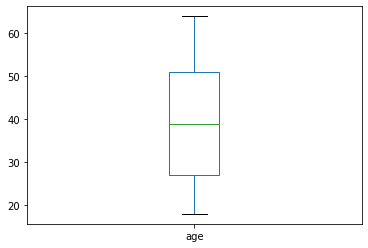

In [26]:
df['age'].plot(kind = 'box');


## 24. Visualize the age distribution using histogram

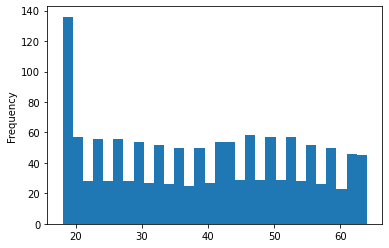

In [27]:
df['age'].plot(kind = 'hist', bins = 30);